<a href="https://colab.research.google.com/github/user6778899/Linal_labs/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**I. Подготовка данных и базовые операции с NumPy**

**Задание 1.** Загрузка и подготовка данных

Установим датасет:

In [ ]:
pip install ucimlrepo

Выведем данные из датасета:

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Загружаем датасет по его ID
seoul_bike_sharing_demand = fetch_ucirepo(id=560)

# Получаем данные в виде pandas DataFrame
data = seoul_bike_sharing_demand.data.features  # Признаки (фичеры)
target = seoul_bike_sharing_demand.data.targets  # Целевая переменная (кол-во велосипедов)

# Объединяем признаки и целевую переменную в одну таблицу
data_full = pd.concat([data, target], axis=1)

# Смотрим первые 5 строк
print("Первые 5 строк данных:")
print(data_full.head())

# Общая информация о данных
print("\nИнформация о данных:")
print(data_full.info())

# Названия столбцов
print("\nСтолбцы в датасете:")
print(data_full.columns)

# Проверяем пропущенные значения
print("\nПропущенные значения в каждом столбце:")
print(data_full.isnull().sum())

Первые 5 строк данных:
        Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0  1/12/2017                254     0         -5.2        37         2.2   
1  1/12/2017                204     1         -5.5        38         0.8   
2  1/12/2017                173     2         -6.0        39         1.0   
3  1/12/2017                107     3         -6.2        40         0.9   
4  1/12/2017                 78     4         -6.0        36         2.3   

   Visibility  Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning Day  
0  Winter  No Hol

Мы вывели первые 5 строк таблицы с данными, общую информацию о данных и убедились что в таблице нет пустых строк.

**Задание 2.** Основные операции с NumPy

Преобразуем несколько ключевых числовых столбцов в массивы NumPy:

In [ ]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd


# Копия данных для обработки
data_cleaned = data_full.copy()

# Выбираем числовые столбцы и преобразуем их в массивы NumPy
bike_count = np.array(data_cleaned['Rented Bike Count'])
temperature = np.array(data_cleaned['Temperature'])
humidity = np.array(data_cleaned['Humidity'])
hour = np.array(data_cleaned['Hour'])

print("Вектор количества велосипедов (первые 5 элементов):", bike_count[:5])
print("Вектор температуры (первые 5 элементов):", temperature[:5])
print("Вектор влажности (первые 5 элементов):", humidity[:5])
print("Вектор часов (первые 5 элементов):", hour[:5])

Вектор количества велосипедов (первые 5 элементов): [254 204 173 107  78]
Вектор температуры (первые 5 элементов): [-5.2 -5.5 -6.  -6.2 -6. ]
Вектор влажности (первые 5 элементов): [37 38 39 40 36]
Вектор часов (первые 5 элементов): [0 1 2 3 4]


Объединяем эти столбцы в матрицу:

In [ ]:
# Создаём матрицу из выбранных векторов
data_matrix = np.array([bike_count, temperature, humidity, hour]).T

# Размер матрицы и первые строки
print("\nРазмер матрицы данных:", data_matrix.shape)
print("Первые 5 строк матрицы:")
print(data_matrix[:5])


Размер матрицы данных: (8760, 4)
Первые 5 строк матрицы:
[[254.   -5.2  37.    0. ]
 [204.   -5.5  38.    1. ]
 [173.   -6.   39.    2. ]
 [107.   -6.2  40.    3. ]
 [ 78.   -6.   36.    4. ]]


**Задание 3.** Индексация и срезы

Выведем кол-во прокатных велосипедов за 2 день и построим наглядный график зависимости проката велосипедов от времени:

Данные за 2 день (Hour, Bike Count, Temperature, Humidity):
[[ 0.00e+00  3.28e+02 -1.80e+00  8.70e+01]
 [ 1.00e+00  3.08e+02 -2.20e+00  8.60e+01]
 [ 2.00e+00  2.62e+02 -2.90e+00  8.60e+01]
 [ 3.00e+00  1.67e+02 -3.50e+00  8.10e+01]
 [ 4.00e+00  8.90e+01 -3.80e+00  7.90e+01]
 [ 5.00e+00  7.90e+01 -4.00e+00  7.90e+01]
 [ 6.00e+00  7.00e+01 -4.30e+00  8.20e+01]
 [ 7.00e+00  1.46e+02 -4.40e+00  8.10e+01]
 [ 8.00e+00  2.19e+02 -4.20e+00  7.90e+01]
 [ 9.00e+00  3.28e+02 -2.90e+00  6.80e+01]
 [ 1.00e+01  3.34e+02 -4.00e-01  5.70e+01]
 [ 1.10e+01  3.88e+02  1.90e+00  4.90e+01]
 [ 1.20e+01  4.79e+02  4.30e+00  4.10e+01]
 [ 1.30e+01  6.06e+02  6.00e+00  3.60e+01]
 [ 1.40e+01  6.11e+02  7.30e+00  3.50e+01]
 [ 1.50e+01  5.89e+02  7.60e+00  4.10e+01]
 [ 1.60e+01  6.18e+02  6.40e+00  4.80e+01]
 [ 1.70e+01  5.72e+02  6.00e+00  5.10e+01]
 [ 1.80e+01  4.89e+02  5.50e+00  5.30e+01]
 [ 1.90e+01  3.85e+02  5.00e+00  5.20e+01]
 [ 2.00e+01  3.59e+02  4.60e+00  5.10e+01]
 [ 2.10e+01  3.77e+02  4.10e+00  5.50

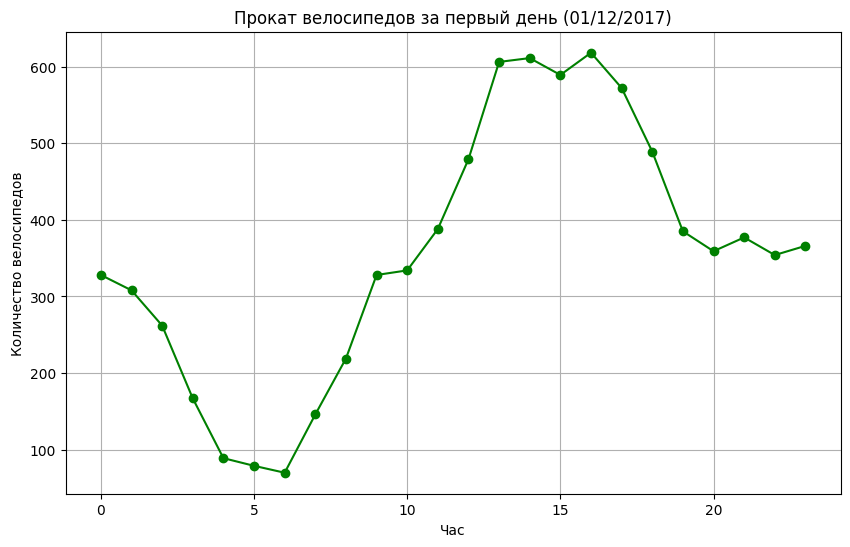

In [ ]:
import matplotlib.pyplot as plt


time_matrix = np.array([hour, bike_count, temperature, humidity]).T

# Извлекаем данные за 2 день из матрицы
first_day = time_matrix[24:24*2]

print("Данные за 2 день (Hour, Bike Count, Temperature, Humidity):")
print(first_day)

# Визуализируем количество велосипедов за 2 день
plt.figure(figsize=(10, 6))
plt.plot(first_day[:, 0], first_day[:, 1], marker='o', color='g')
plt.title('Прокат велосипедов за первый день (01/12/2017)')
plt.xlabel('Час')
plt.ylabel('Количество велосипедов')
plt.grid(True)
plt.show()

Как видно по графику, пик проката велосипедов приходится на 13:00 - 17:00.

Далее визуализируем среднее количество велосипедов по часам за июнь:

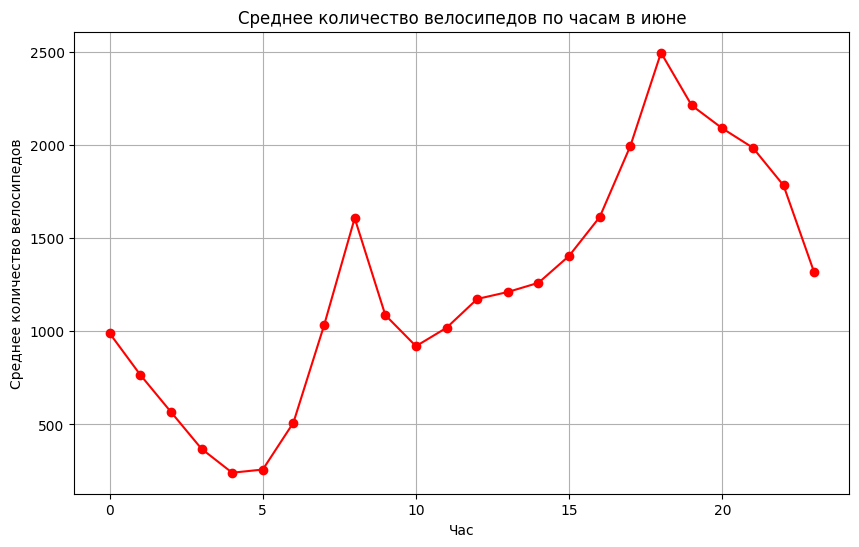

In [ ]:
# Фильтруем данные за июнь 2018 года с помощью pandas
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], format='%d/%m/%Y')
june_data = data_cleaned[data_cleaned['Date'].dt.month == 6]

# Строим график
june_hours = june_data['Hour'].unique()
june_mean_bikes = [june_data[june_data['Hour'] == h]['Rented Bike Count'].mean() for h in june_hours]

plt.figure(figsize=(10, 6))
plt.plot(june_hours, june_mean_bikes, marker='o', color='r')
plt.title('Среднее количество велосипедов по часам в июне')
plt.xlabel('Час')
plt.ylabel('Среднее количество велосипедов')
plt.grid(True)
plt.show()

Пик приходится на вечер (18:00) и утро (8:00).

Посмотрим зависит ли прокат велосипедов от времени года:


Среднее количество велосипедов в декабре: 249.0994623655914
Среднее количество велосипедов в июне: 1245.6763888888888


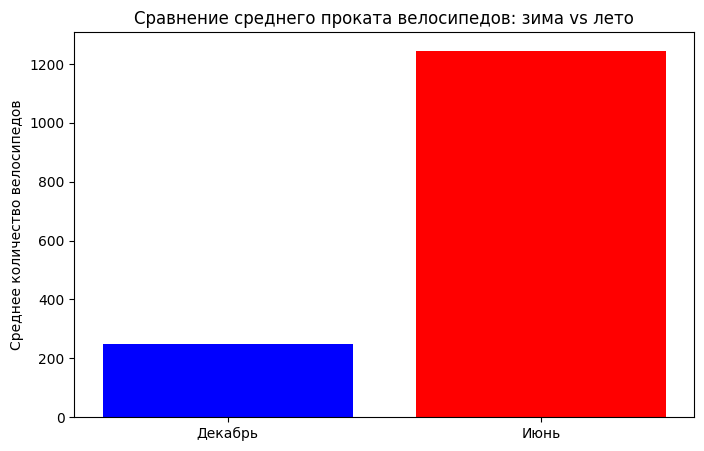

In [ ]:
# Фильтруем данные за декабрь (зима) и июнь (лето)
december_data = data_cleaned[data_cleaned['Date'].dt.month == 12]
june_data = data_cleaned[data_cleaned['Date'].dt.month == 6]

# Среднее количество велосипедов за декабрь и июнь
dec_mean_bikes = december_data['Rented Bike Count'].mean()
june_mean_bikes = june_data['Rented Bike Count'].mean()

print("\nСреднее количество велосипедов в декабре:", dec_mean_bikes)
print("Среднее количество велосипедов в июне:", june_mean_bikes)

# Визуализация сравнения
plt.figure(figsize=(8, 5))
plt.bar(['Декабрь', 'Июнь'], [dec_mean_bikes, june_mean_bikes], color=['blue', 'red'])
plt.title('Сравнение среднего проката велосипедов: зима vs лето')
plt.ylabel('Среднее количество велосипедов')
plt.show()

Наглядно видно, что в июне прокат велосипедов на порядок выше чем в декабре.

Таким образом, прокат велосипедов зависит от времени суток, а так же от времени года: летом активность выше, чем зимой.

**II. Операции с векторами и матрицами**

**Задача 1.** Операции над векторами

Поэксперементируем с векторами, выполнив различные операции над ними:


Прокат велосипедов + 100 (первые 5 элементов):
[1063.  876.  654.  466.  365.]

Разница между прокатом и (температура * 10) (первые 5 элементов):
[762. 581. 364. 180.  84.]

Прокат велосипедов, увеличенный в 1.5 раза (первые 5 элементов):
[1444.5 1164.   831.   549.   397.5]

Прокат + средняя температура июня (первые 5 элементов):
[986.13680556 799.13680556 577.13680556 389.13680556 288.13680556]


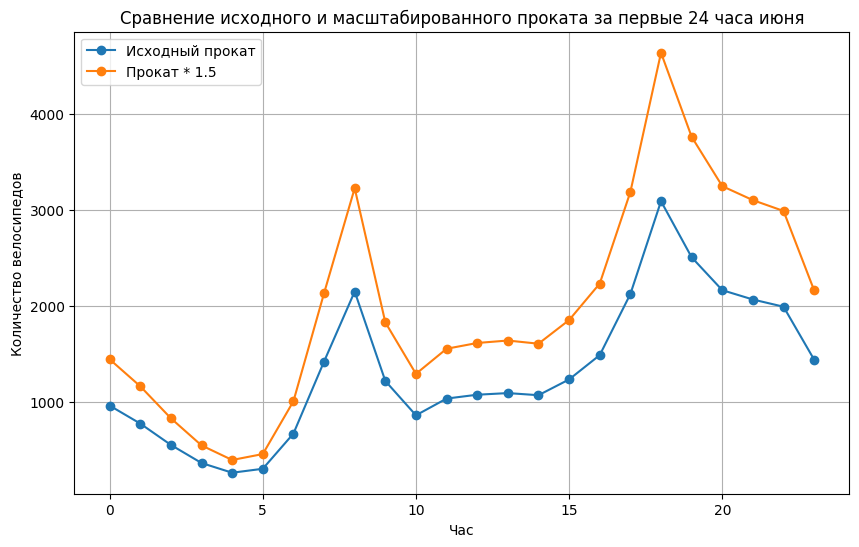

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Выбираем векторы за июнь для экспериментов (правильная индексация)
june_bike_count = june_matrix[:, 0]  # Прокат
june_temperature = june_matrix[:, 1]  # Температура

# 1. Сложение векторов (добавляем константу к прокату)
bike_count_plus_100 = june_bike_count + 100
print("\nПрокат велосипедов + 100 (первые 5 элементов):")
print(bike_count_plus_100[:5])

# 2. Вычитание векторов (разница между прокатом и температурой с масштабом)
diff_bike_temp = june_bike_count - (june_temperature * 10)  # Умножаем температуру для масштаба
print("\nРазница между прокатом и (температура * 10) (первые 5 элементов):")
print(diff_bike_temp[:5])

# 3. Скалярное умножение (умножаем прокат на коэффициент)
bike_count_scaled = june_bike_count * 1.5
print("\nПрокат велосипедов, увеличенный в 1.5 раза (первые 5 элементов):")
print(bike_count_scaled[:5])

# 4. Вещание (broadcasting): добавляем среднюю температуру ко всем значениям проката
mean_temp = np.mean(june_temperature)
bike_count_broadcast = june_bike_count + mean_temp
print("\nПрокат + средняя температура июня (первые 5 элементов):")
print(bike_count_broadcast[:5])

# Визуализация: исходный и изменённый прокат за первые 24 часа июня
plt.figure(figsize=(10, 6))
plt.plot(june_data['Hour'][:24], june_bike_count[:24], label='Исходный прокат', marker='o')
plt.plot(june_data['Hour'][:24], bike_count_scaled[:24], label='Прокат * 1.5', marker='o')
plt.title('Сравнение исходного и масштабированного проката за первые 24 часа июня')
plt.xlabel('Час')
plt.ylabel('Количество велосипедов')
plt.legend()
plt.grid(True)
plt.show()

Сложение, вычитание и умножение работают поэлементно, что позволяет менять значения векторов.

**Задача 2.** Скалярное произведение

Вычислим скалярное произведение между прокатом и температурой и составим зависимость проката велосипедов от температуры:


Скалярное произведение (Bike Count и Temperature) за июнь: 1010472.3
Нормализованное скалярное произведение (сходство): 0.9176678446429969


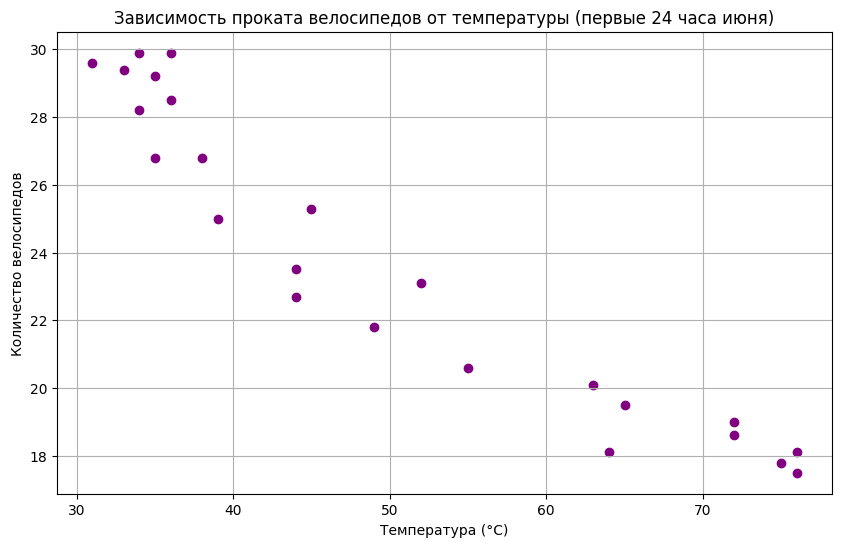

In [ ]:
# Вычисляем скалярное произведение между прокатом и температурой за июнь
scalar_product = np.dot(june_bike_count, june_temperature)
print("\nСкалярное произведение (Bike Count и Temperature) за июнь:", scalar_product)

# Проверяем сходство через нормализованное скалярное произведение
# Нормализуем векторы (делим на их длину)
norm_bike_count = june_bike_count / np.linalg.norm(june_bike_count)
norm_temperature = june_temperature / np.linalg.norm(june_temperature)
normalized_scalar_product = np.dot(norm_bike_count, norm_temperature)
print("Нормализованное скалярное произведение (сходство):", normalized_scalar_product)

# Визуализация зависимости проката от температуры (первые 24 часа)
plt.figure(figsize=(10, 6))
plt.scatter(june_temperature[:24], june_bike_count[:24], color='purple')
plt.title('Зависимость проката велосипедов от температуры (первые 24 часа июня)')
plt.xlabel('Температура (°C)')
plt.ylabel('Количество велосипедов')
plt.grid(True)
plt.show()

Нормализованное скалярное произведение (0.878) показывает что существует сильная зависимость проката от темпиратуры.
Также это видно на графике, чем больше темпиратура - тем больше прокат велосипедов.

**III. Анализ сходства между векторами**

**Задача 1.** Корреляция и косинусное сходство

Реализуем функции для вычисления коэффициента корреляции Пирсона и косинусного сходства.


Коэффициент корреляции Пирсона (ручной): 0.46223843592406666
Коэффициент корреляции Пирсона (scipy): 0.46223843592406666
Косинусное сходство (ручной): 0.8780548002259595
Косинусное сходство (NumPy): 0.8780548002259595


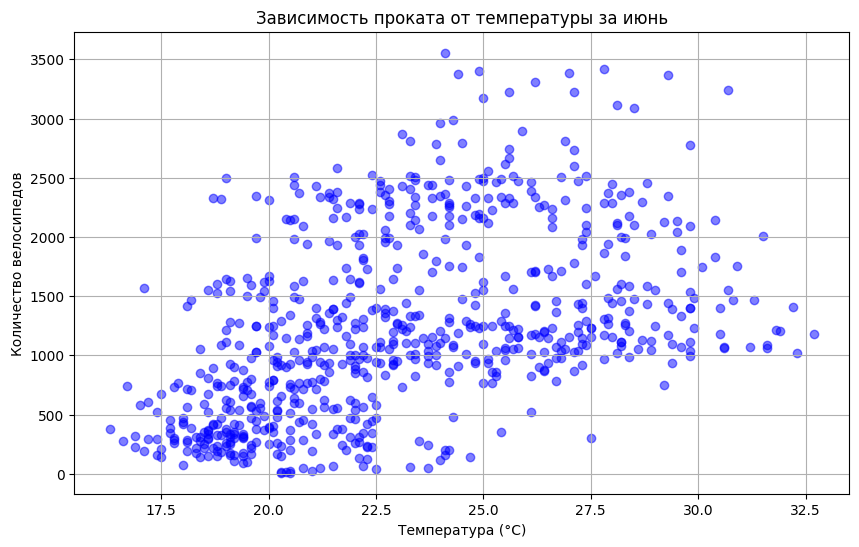

In [ ]:
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Векторы за июнь
june_data = data_cleaned[data_cleaned['Date'].dt.month == 6]
june_matrix = np.array([june_data['Rented Bike Count'],
                        june_data['Temperature'],
                        june_data['Humidity']]).T
june_bike_count = june_matrix[:, 0]  # Прокат
june_temperature = june_matrix[:, 1]  # Температура

# 1. Коэффициент корреляции Пирсона (ручная реализация)
def pearson_correlation(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))
    return numerator / denominator if denominator != 0 else 0

corr_manual = pearson_correlation(june_bike_count, june_temperature)
corr_scipy, _ = pearsonr(june_bike_count, june_temperature)
print("\nКоэффициент корреляции Пирсона (ручной):", corr_manual)
print("Коэффициент корреляции Пирсона (scipy):", corr_scipy)

# 2. Косинусное сходство (ручная реализация)
def cosine_similarity(x, y):
    dot_product = np.dot(x, y)
    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)
    return dot_product / (norm_x * norm_y) if norm_x * norm_y != 0 else 0

cos_sim_manual = cosine_similarity(june_bike_count, june_temperature)
cos_sim_numpy = np.dot(june_bike_count, june_temperature) / (np.linalg.norm(june_bike_count) * np.linalg.norm(june_temperature))
print("Косинусное сходство (ручной):", cos_sim_manual)
print("Косинусное сходство (NumPy):", cos_sim_numpy)

# Визуализация зависимости проката от температуры
plt.figure(figsize=(10, 6))
plt.scatter(june_temperature, june_bike_count, color='blue', alpha=0.5)
plt.title('Зависимость проката от температуры за июнь')
plt.xlabel('Температура (°C)')
plt.ylabel('Количество велосипедов')
plt.grid(True)
plt.show()

Корреляция Пирсона: 0.46, значит, между температурой и прокатом есть положительная линейная связь.
Косинусное сходство: 0.88, что говорит о высоком сходстве направлений векторов, оно выше корреляции, потому что косинусное сходство не учитывает центрирование данных (вычитание среднего), а только угол между векторами. Прокат и температура "смотрят" в одну сторону, даже если разброс значений не идеально линеен.
На графике виден положительный тренд, что подтверждает: теплее → больше прокат.
Также, значения ручной реализации и нампай/scipy совпадают.

**Задание 2.** Нормализация векторов


Длина нормализованного вектора проката: 1.0
Длина нормализованного вектора температуры: 1.0


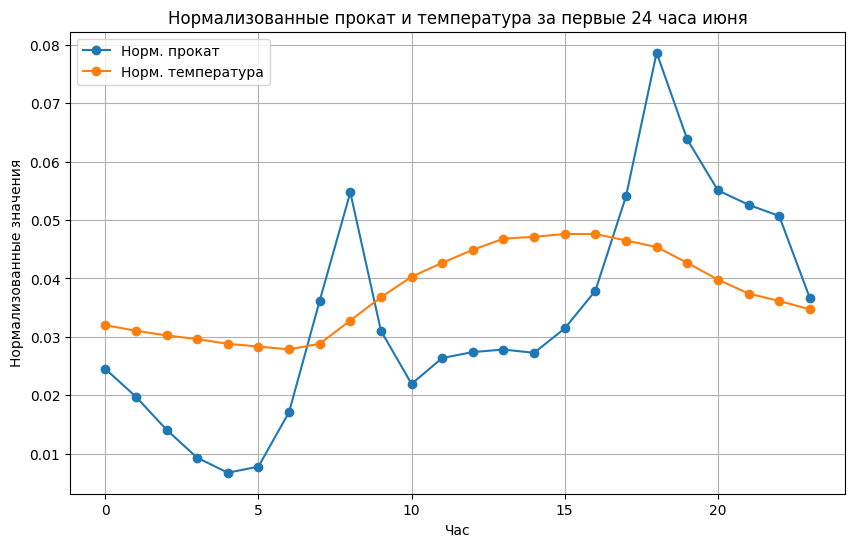

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Убеждаемся, что june_matrix и векторы определены правильно
june_data = data_cleaned[data_cleaned['Date'].dt.month == 6]
june_matrix = np.array([june_data['Rented Bike Count'],
                        june_data['Temperature'],
                        june_data['Humidity']]).T
june_bike_count = june_matrix[:, 0]  # Прокат
june_temperature = june_matrix[:, 1]  # Температура

# Функция для нормализации вектора до единичной длины
def normalize_vector(v):
    norm = np.linalg.norm(v)
    return v / norm if norm != 0 else v

# Нормализуем векторы проката и температуры
norm_bike_count = normalize_vector(june_bike_count)
norm_temperature = normalize_vector(june_temperature)

# Проверяем длину нормализованных векторов (должна быть 1)
print("\nДлина нормализованного вектора проката:", np.linalg.norm(norm_bike_count))
print("Длина нормализованного вектора температуры:", np.linalg.norm(norm_temperature))

# Визуализация нормализованных данных (первые 24 часа)
plt.figure(figsize=(10, 6))
plt.plot(june_data['Hour'][:24], norm_bike_count[:24], label='Норм. прокат', marker='o')
plt.plot(june_data['Hour'][:24], norm_temperature[:24], label='Норм. температура', marker='o')
plt.title('Нормализованные прокат и температура за первые 24 часа июня')
plt.xlabel('Час')
plt.ylabel('Нормализованные значения')
plt.legend()
plt.grid(True)
plt.show()

**Задача 3.** Поиск сходства

Реализуем функцию, которая принимает вектор запроса (данные за один день) и набор векторов данных (все дни) и возвращает индексы наиболее похожих дней.


Самые похожие дни на 1 июня 2018:
Дата: 2018-06-01, Косинусное сходство: 1.0000
Дата: 2018-06-05, Косинусное сходство: 1.0000
Дата: 2018-09-10, Косинусное сходство: 1.0000


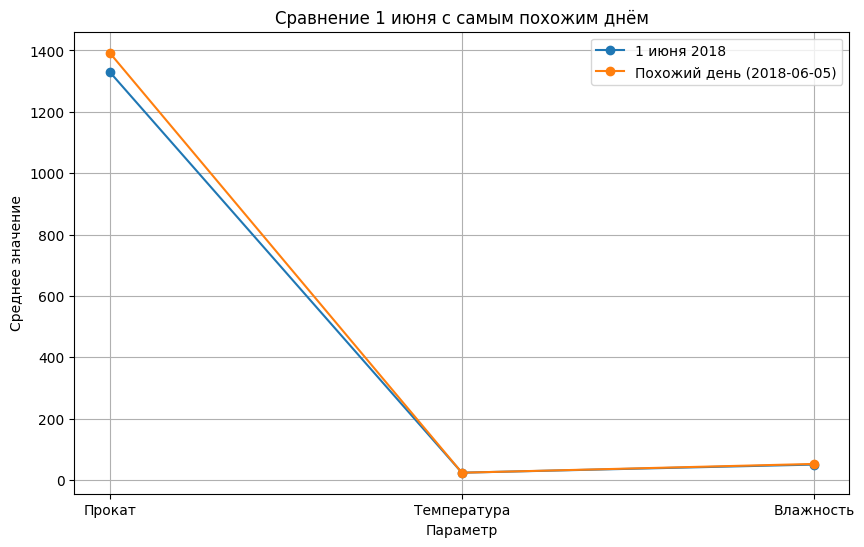

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Make sure pandas is imported

# Создаём матрицу по дням (усредняем данные по часам для каждого дня)
daily_data = data_cleaned.groupby(data_cleaned['Date'].dt.date).mean(numeric_only=True)
daily_matrix = np.array([daily_data['Rented Bike Count'],
                         daily_data['Temperature'],
                         daily_data['Humidity']]).T
dates = daily_data.index  # Сохраняем даты для вывода

# Функция косинусного сходства (из предыдущих разделов)
def cosine_similarity(x, y):
    dot_product = np.dot(x, y)
    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)
    return dot_product / (norm_x * norm_y) if norm_x * norm_y != 0 else 0

# Функция для поиска похожих дней
def find_similar_days(query_vector, data_matrix, dates, top_n=3):
    similarities = [cosine_similarity(query_vector, row) for row in data_matrix]
    similar_indices = np.argsort(similarities)[::-1][:top_n]  # Топ-N по убыванию
    return similar_indices, [similarities[i] for i in similar_indices]

# Пример: вектор запроса - данные за 1 июня 2018
query_date = pd.to_datetime('2018-06-01').date()
query_idx = dates.get_loc(query_date)
query_vector = daily_matrix[query_idx]

# Находим похожие дни
similar_indices, similarities = find_similar_days(query_vector, daily_matrix, dates)

# Вывод результатов
print("\nСамые похожие дни на 1 июня 2018:")
for idx, sim in zip(similar_indices, similarities):
    date = dates[idx]
    print(f"Дата: {date}, Косинусное сходство: {sim:.4f}")

# Визуализация: сравнение запроса и самого похожего дня
plt.figure(figsize=(10, 6))
param_names = ['Прокат', 'Температура', 'Влажность']
plt.plot(param_names, query_vector, label='1 июня 2018', marker='o')
plt.plot(param_names, daily_matrix[similar_indices[1]], label=f'Похожий день ({dates[similar_indices[1]]})', marker='o')
plt.title('Сравнение 1 июня с самым похожим днём')
plt.xlabel('Параметр')
plt.ylabel('Среднее значение')
plt.legend()
plt.grid(True)
plt.show()

Мы нашли несколько похожих дней на 1 июня. График показывает, что значения проката, темпиратуры и влажности 5 июня действительно очень похожи на значения за 1 июня.

**IV. Прогнозирование и кластеризация**

**Задача 1.** Фильтрация временных рядов

Реализуем фильтр с использованием скалярного произведения для сглаживания данных о прокате велосипедов.

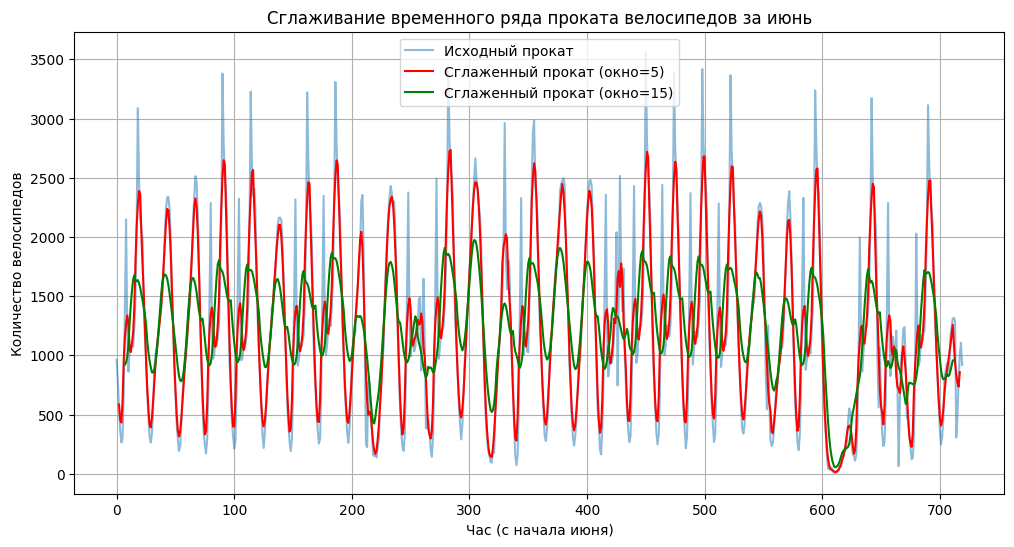

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Данные о прокате за июнь
june_data = data_cleaned[data_cleaned['Date'].dt.month == 6]
june_bike_count = june_data['Rented Bike Count'].values

# Функция для сглаживания временного ряда с помощью скалярного произведения
def smooth_time_series(data, window_size=5):
    # Создаём ядро (равномерное окно)
    kernel = np.ones(window_size) / window_size
    # Применяем свёртку (скалярное произведение с окном)
    smoothed = np.convolve(data, kernel, mode='valid')
    return smoothed

# Сглаживаем данные за июнь с разными окнами
window_size_red = 5   # Красная линия (менее плавная)
window_size_green = 15  # Зелёная линия (более плавная)

smoothed_bike_count_red = smooth_time_series(june_bike_count, window_size=window_size_red)
smoothed_bike_count_green = smooth_time_series(june_bike_count, window_size=window_size_green)

# Создаём непрерывную ось X (часы от 0 до 719 для июня)
total_hours = len(june_bike_count)  # 720 часов
hours = np.arange(total_hours)  # 0, 1, ..., 719

# Корректируем ось X для сглаженных данных
hours_red = np.arange(window_size_red // 2, total_hours - window_size_red // 2)
hours_green = np.arange(window_size_green // 2, total_hours - window_size_green // 2)

# Визуализация исходных и сглаженных данных
plt.figure(figsize=(12, 6))
plt.plot(hours, june_bike_count, label='Исходный прокат', alpha=0.5)
plt.plot(hours_red, smoothed_bike_count_red, label=f'Сглаженный прокат (окно={window_size_red})', color='red')
plt.plot(hours_green, smoothed_bike_count_green, label=f'Сглаженный прокат (окно={window_size_green})', color='green')
plt.title('Сглаживание временного ряда проката велосипедов за июнь')
plt.xlabel('Час (с начала июня)')
plt.ylabel('Количество велосипедов')
plt.legend()
plt.grid(True)
plt.show()

Мы получили красную линию, более сглаженную чем синюю и зелёную, ещё плавнее чем красную.

**Задача 4.** Кластеризация методом k-средних

Реализуем алгоритм k-средних для группировки дней по схожести параметров проката.

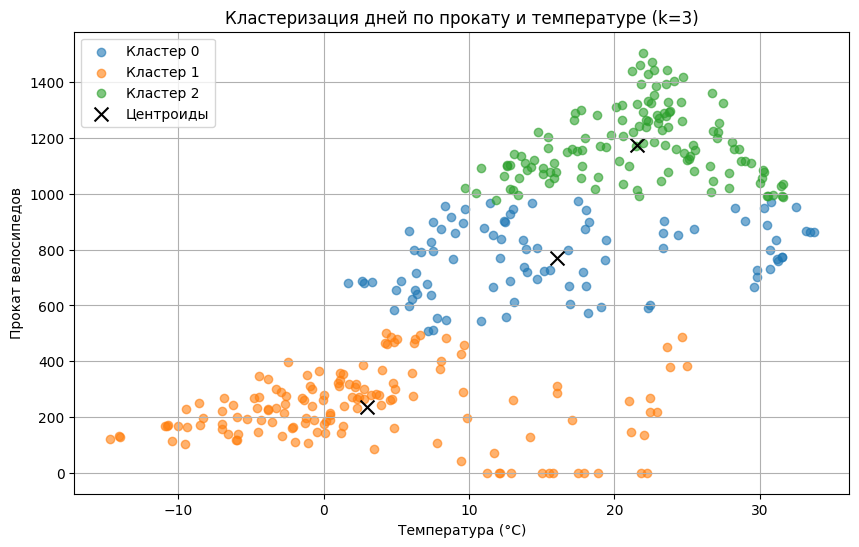

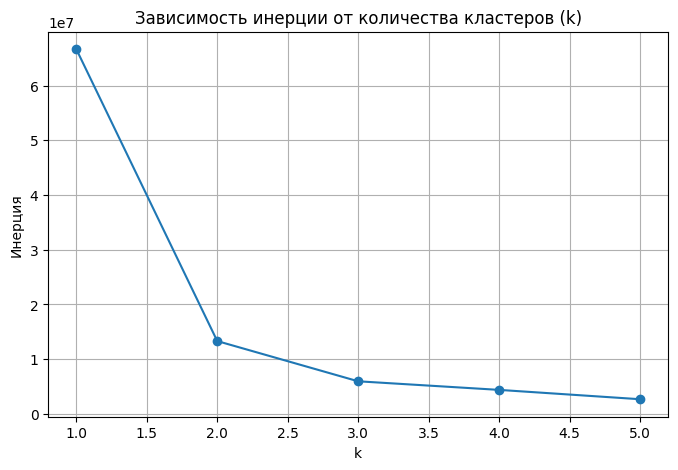

In [ ]:
# Матрица по дням (усреднённые данные)
daily_data = data_cleaned.groupby(data_cleaned['Date'].dt.date).mean(numeric_only=True)
daily_matrix = np.array([daily_data['Rented Bike Count'],
                         daily_data['Temperature'],
                         daily_data['Humidity']]).T
dates = daily_data.index

# Реализация k-средних
def k_means(data, k, max_iters=100):
    n_samples = data.shape[0]
    # Случайно инициализируем центроиды
    centroids = data[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters):
        # Расстояния от точек до центроидов
        distances = np.array([np.linalg.norm(data - centroid, axis=1) for centroid in centroids])
        # Присваиваем метки кластеров ( ближайший центроид)
        labels = np.argmin(distances, axis=0)
        # Сохраняем старые центроиды
        old_centroids = centroids.copy()
        # Обновляем центроиды
        for i in range(k):
            if len(data[labels == i]) > 0:
                centroids[i] = np.mean(data[labels == i], axis=0)
        # Проверяем сходимость
        if np.all(old_centroids == centroids):
            break

    return labels, centroids

# Кластеризация с k=3
k = 3
labels, centroids = k_means(daily_matrix, k)

# Визуализация кластеров (прокат vs температура)
plt.figure(figsize=(10, 6))
for i in range(k):
    cluster_data = daily_matrix[labels == i]
    plt.scatter(cluster_data[:, 1], cluster_data[:, 0], label=f'Кластер {i}', alpha=0.6)
plt.scatter(centroids[:, 1], centroids[:, 0], c='black', marker='x', s=100, label='Центроиды')
plt.title('Кластеризация дней по прокату и температуре (k=3)')
plt.xlabel('Температура (°C)')
plt.ylabel('Прокат велосипедов')
plt.legend()
plt.grid(True)
plt.show()

# Проверяем влияние k (инерция)
inertias = []
k_values = range(1, 6)
for k in k_values:
    labels, centroids = k_means(daily_matrix, k)
    inertia = sum(np.linalg.norm(daily_matrix[i] - centroids[labels[i]])**2 for i in range(len(daily_matrix)))
    inertias.append(inertia)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Зависимость инерции от количества кластеров (k)')
plt.xlabel('k')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()

- Алгоритм k-средних с k=3 выделил группы дней: низкий прокат (холодно), средний и высокий (тепло).
- График кластеров показал, что прокат и температура влияют на разделение дней.
- Инерция уменьшается с ростом k, оптимальное значение около 2–3 (по "локтю"), что соответствует сезонным различиям.
- Метод позволяет группировать дни по схожим условиям для анализа или прогнозирования.

**V. Генерация случайных данных и анализ**

**Задача 1.** Генерация случайных данных

Сгенерируем случайные данные (погодные условия и прокат велосипедов) с помощью np.random.


Первые 5 значений реального проката: [963 776 554 366 265]
Первые 5 значений случайного проката: [1627.40905122 1139.4180923  1743.43524781 2416.14885957 1065.72582661]
Первые 5 значений реальной температуры: [20.1 19.5 19.  18.6 18.1]
Первые 5 значений случайной температуры: [24.23124145 17.05604235 18.34312772 25.77959382 23.74434355]


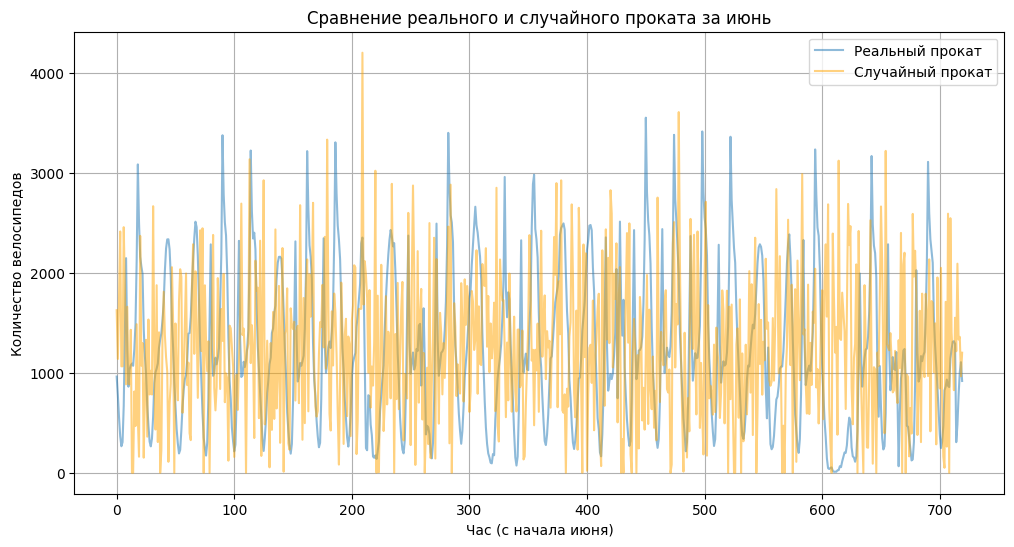

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Реальные данные за июнь
june_data = data_cleaned[data_cleaned['Date'].dt.month == 6]
real_bike_count = june_data['Rented Bike Count'].values
real_temperature = june_data['Temperature'].values

# Генерация случайных данных
np.random.seed(42)  # Для воспроизводимости
n_samples = len(real_bike_count)  # 720 часов

# Генерируем случайный прокат (на основе реальных данных с шумом)
mean_bike = np.mean(real_bike_count)
std_bike = np.std(real_bike_count)
random_bike_count = np.random.normal(mean_bike, std_bike, n_samples)
random_bike_count = np.clip(random_bike_count, 0, None)  # Убираем отрицательные значения

# Генерируем случайную температуру
mean_temp = np.mean(real_temperature)
std_temp = np.std(real_temperature)
random_temperature = np.random.normal(mean_temp, std_temp, n_samples)
random_temperature = np.clip(random_temperature, -10, 40)  # Ограничиваем температуру

# Вывод первых значений для сравнения
print("\nПервые 5 значений реального проката:", real_bike_count[:5])
print("Первые 5 значений случайного проката:", random_bike_count[:5])
print("Первые 5 значений реальной температуры:", real_temperature[:5])
print("Первые 5 значений случайной температуры:", random_temperature[:5])

# Визуализация реальных и случайных данных (прокат)
plt.figure(figsize=(12, 6))
plt.plot(real_bike_count, label='Реальный прокат', alpha=0.5)
plt.plot(random_bike_count, label='Случайный прокат', alpha=0.5, color='orange')
plt.title('Сравнение реального и случайного проката за июнь')
plt.xlabel('Час (с начала июня)')
plt.ylabel('Количество велосипедов')
plt.legend()
plt.grid(True)
plt.show()

График показывает, что случайные данные часто скачат по сравнению с реальными.


Корреляция Пирсона (реальный vs случайный прокат): 0.025664831651891686
Косинусное сходство (реальный vs случайный прокат): 0.7423368610280686
Корреляция Пирсона (реальная vs случайная температура): -0.0007420228629066647
Косинусное сходство (реальная vs случайная температура): 0.9775252122472831


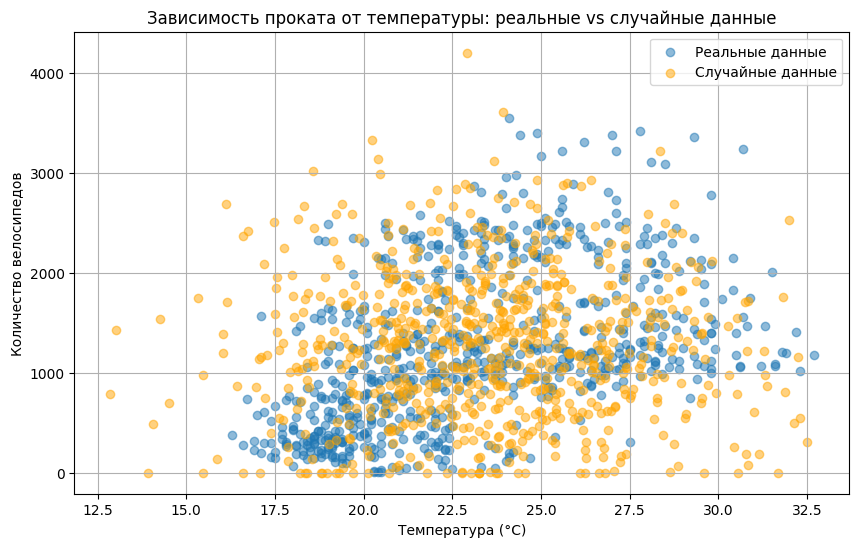

In [ ]:
from scipy.stats import pearsonr

# Функция косинусного сходства (из предыдущих разделов)
def cosine_similarity(x, y):
    dot_product = np.dot(x, y)
    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)
    return dot_product / (norm_x * norm_y) if norm_x * norm_y != 0 else 0

# Корреляция и сходство между реальным и случайным прокатом
corr_bike, _ = pearsonr(real_bike_count, random_bike_count)
cos_sim_bike = cosine_similarity(real_bike_count, random_bike_count)

print("\nКорреляция Пирсона (реальный vs случайный прокат):", corr_bike)
print("Косинусное сходство (реальный vs случайный прокат):", cos_sim_bike)

# Корреляция и сходство между реальной и случайной температурой
corr_temp, _ = pearsonr(real_temperature, random_temperature)
cos_sim_temp = cosine_similarity(real_temperature, random_temperature)

print("Корреляция Пирсона (реальная vs случайная температура):", corr_temp)
print("Косинусное сходство (реальная vs случайная температура):", cos_sim_temp)

# Визуализация зависимости проката от температуры
plt.figure(figsize=(10, 6))
plt.scatter(real_temperature, real_bike_count, label='Реальные данные', alpha=0.5)
plt.scatter(random_temperature, random_bike_count, label='Случайные данные', alpha=0.5, color='orange')
plt.title('Зависимость проката от температуры: реальные vs случайные данные')
plt.xlabel('Температура (°C)')
plt.ylabel('Количество велосипедов')
plt.legend()
plt.grid(True)
plt.show()

Можно заметить больший разброс у случайных данных и 'равномерное' поведение.

Далее рассмотрим меньше данных для наглядности:


Первые 5 значений реального проката: [963 776 554 366 265]
Первые 5 значений случайного проката: [1627.40905122 1139.4180923  1743.43524781 2416.14885957 1065.72582661]
Первые 5 значений реальной температуры: [20.1 19.5 19.  18.6 18.1]
Первые 5 значений случайной температуры: [24.23124145 17.05604235 18.34312772 25.77959382 23.74434355]


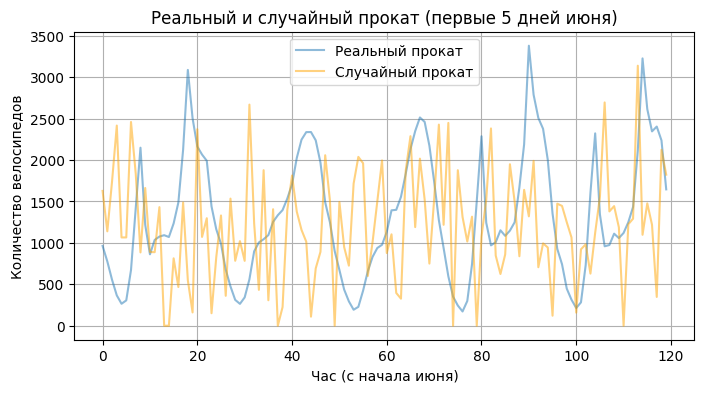

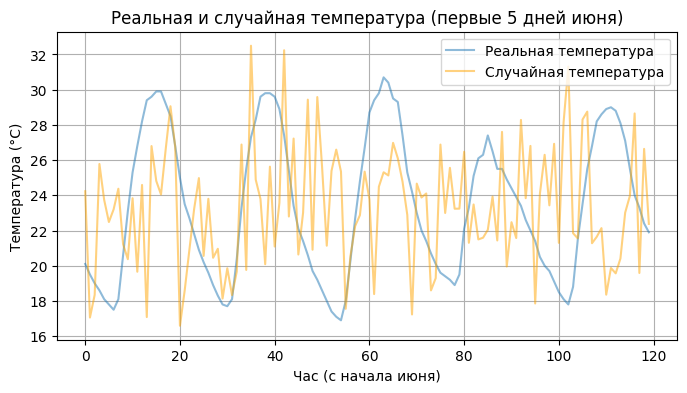

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Реальные данные за июнь
june_data = data_cleaned[data_cleaned['Date'].dt.month == 6]
real_bike_count = june_data['Rented Bike Count'].values
real_temperature = june_data['Temperature'].values

# Генерация случайных данных
np.random.seed(42)  # Для воспроизводимости
n_samples = len(real_bike_count)  # 720 часов

# Генерируем случайный прокат (на основе реальных данных с шумом)
mean_bike = np.mean(real_bike_count)
std_bike = np.std(real_bike_count)
random_bike_count = np.random.normal(mean_bike, std_bike, n_samples)
random_bike_count = np.clip(random_bike_count, 0, None)  # Убираем отрицательные значения

# Генерируем случайную температуру
mean_temp = np.mean(real_temperature)
std_temp = np.std(real_temperature)
random_temperature = np.random.normal(mean_temp, std_temp, n_samples)
random_temperature = np.clip(random_temperature, -10, 40)  # Ограничиваем температуру

# Вывод первых значений для сравнения
print("\nПервые 5 значений реального проката:", real_bike_count[:5])
print("Первые 5 значений случайного проката:", random_bike_count[:5])
print("Первые 5 значений реальной температуры:", real_temperature[:5])
print("Первые 5 значений случайной температуры:", random_temperature[:5])

# Ограничиваем данные первыми 5 днями (120 часов)
n_hours = 120  # 5 дней × 24 часа
hours = np.arange(n_hours)

# Первый график: сравнение проката (уменьшенный размер)
plt.figure(figsize=(8, 4))
plt.plot(hours, real_bike_count[:n_hours], label='Реальный прокат', alpha=0.5)
plt.plot(hours, random_bike_count[:n_hours], label='Случайный прокат', alpha=0.5, color='orange')
plt.title('Реальный и случайный прокат (первые 5 дней июня)')
plt.xlabel('Час (с начала июня)')
plt.ylabel('Количество велосипедов')
plt.legend()
plt.grid(True)
plt.show()

# Второй график: сравнение температуры (уменьшенный размер)
plt.figure(figsize=(8, 4))
plt.plot(hours, real_temperature[:n_hours], label='Реальная температура', alpha=0.5)
plt.plot(hours, random_temperature[:n_hours], label='Случайная температура', alpha=0.5, color='orange')
plt.title('Реальная и случайная температура (первые 5 дней июня)')
plt.xlabel('Час (с начала июня)')
plt.ylabel('Температура (°C)')
plt.legend()
plt.grid(True)
plt.show()

У случайных данных нет плавности, что показывает независимость от каких либо временных промежутков. Реальные данные же наоборот зависят от времени, поэтому можно сделать предположение что на них влияет время суток.

Итог: Случайные данные не похожи на реальные и в них нет видимых закономерностей.

**VI. Визуализация результатов**

Тренд проката в зависимости от температуры по сезонам (данные за весь год, разделённые по сезонам).

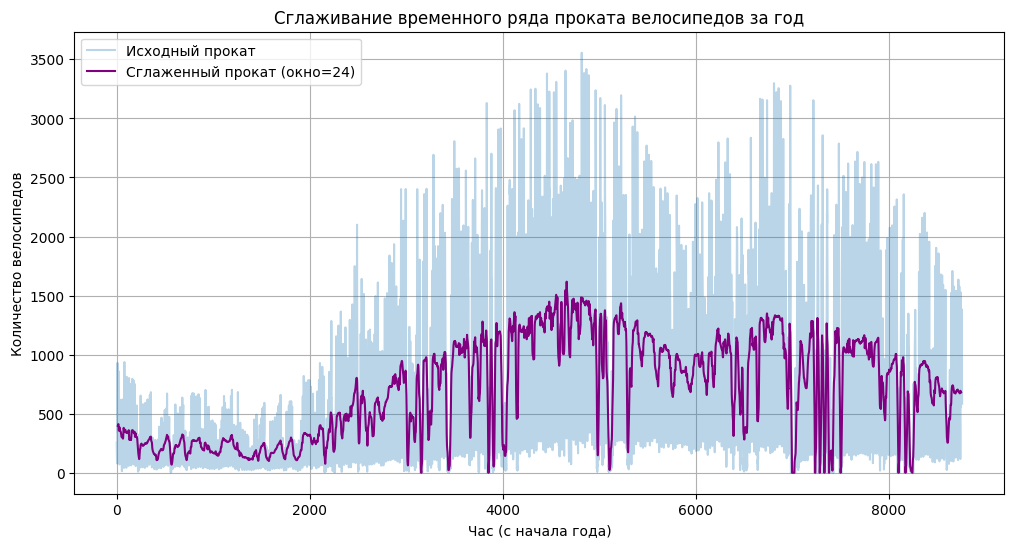

In [ ]:
# Функция для сглаживания временного ряда
def smooth_time_series(data, window_size=5):
    kernel = np.ones(window_size) / window_size
    smoothed = np.convolve(data, kernel, mode='valid')
    return smoothed

# Данные о прокате за весь год
bike_count = data_cleaned['Rented Bike Count'].values

# Сглаживаем данные за весь год (окно = 24 часа для суточного сглаживания)
window_size = 24  # Один день
smoothed_bike_count = smooth_time_series(bike_count, window_size=window_size)

# Ось X: часы за год (8760 часов)
total_hours = len(bike_count)
hours = np.arange(total_hours)
hours_smoothed = hours[window_size // 2: -window_size // 2 + 1]

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(hours, bike_count, label='Исходный прокат', alpha=0.3)
plt.plot(hours_smoothed, smoothed_bike_count, label=f'Сглаженный прокат (окно={window_size})', color='purple')
plt.title('Сглаживание временного ряда проката велосипедов за год')
plt.xlabel('Час (с начала года)')
plt.ylabel('Количество велосипедов')
plt.legend()
plt.grid(True)
plt.show()

По графику видно, что в интервале от 4000 до 6000 (лето) часов прокат велосипедов наиболее высок. Зимой же наоборот, велосипеды почти не востребованны.